<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [108]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-08-19 12:55:04--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
169.63.118.104ourses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv.1’

survey-data.csv.1   100%[===================>] 152.13M  63.3MB/s    in 2.4s    

2025-08-19 12:55:08 (63.3 MB/s) - ‘survey-data.csv.1’ saved [159525875/159525875]



**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [109]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [132]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [133]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [134]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [135]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


,COUNT(*)
0,65437


## Demo: Listing All Tables


To view the names of all tables in the database:


In [136]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [137]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [138]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


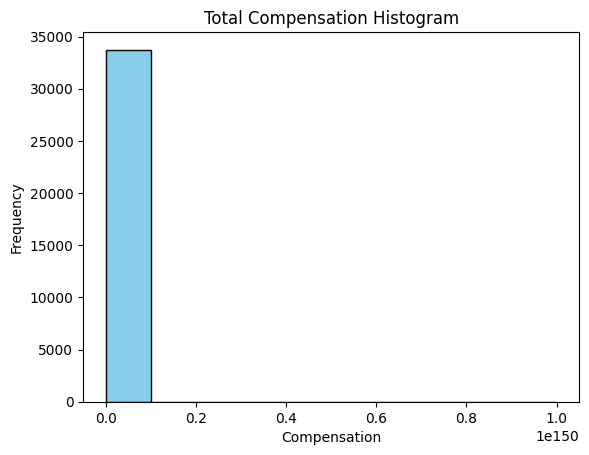

In [139]:
## Write your code here
QUERY = """
SELECT CompTotal
FROM main
"""
df = pd.read_sql_query(QUERY, conn)

# Plot histogram
plt.hist(df['CompTotal'], bins=10, color='skyblue', edgecolor='black')
plt.title('Total Compensation Histogram')
plt.xlabel('Compensation')
plt.ylabel('Frequency')
plt.show()

**Box Plots**

Plot a box plot of Age.


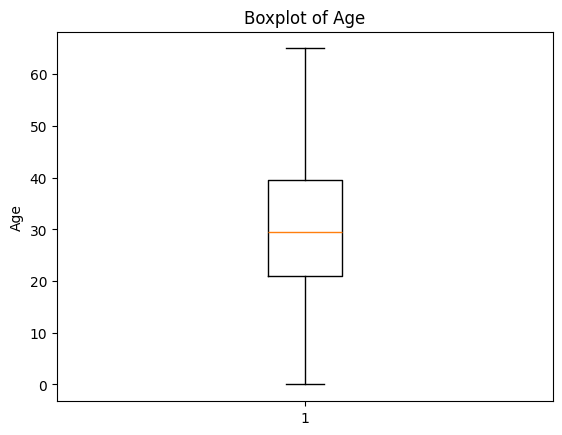

In [140]:
## Write your code here
QUERY = """
SELECT Age
FROM main
"""
df = pd.read_sql_query(QUERY, conn)

# Custom function to map values
def map_age(value):
    if value == 'Under 18 years old':
        return 18
    elif value == '18-24 years old':
        return 21
    elif value == '25-34 years old':
        return 29.5
    elif value == '35-44 years old':
        return 39.5
    elif value == '45-54 years old':
        return 49.5
    elif value == '55-64 years old':
        return 59.5
    elif value == '65 years or older':
        return 65
    else:
        return 0  # Default for random/unknown entries

# Apply the custom function
df['Age'] = df['Age'].apply(map_age)

df['Age'].astype(float)

# Create a boxplot for the 'age' column
plt.boxplot(df['Age'])
plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.show()

### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


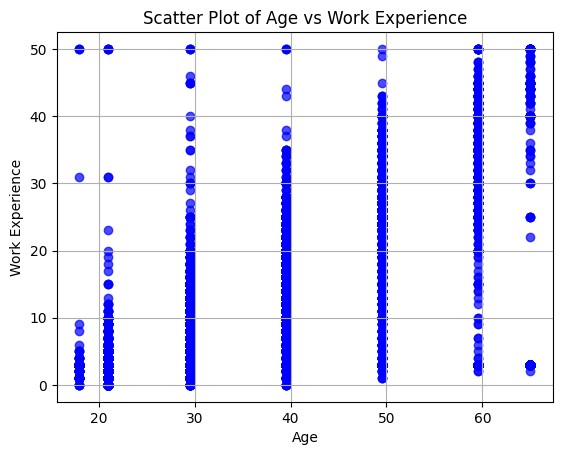

In [141]:
## Write your code here
QUERY = """
SELECT Age, WorkExp
FROM main
"""
df = pd.read_sql_query(QUERY, conn)

# Custom function to map values
def map_age(value):
    if value == 'Under 18 years old':
        return 18
    elif value == '18-24 years old':
        return 21
    elif value == '25-34 years old':
        return 29.5
    elif value == '35-44 years old':
        return 39.5
    elif value == '45-54 years old':
        return 49.5
    elif value == '55-64 years old':
        return 59.5
    elif value == '65 years or older':
        return 65
    else:
        return 29.5  # Default for random/unknown entries - Mode

# Apply the custom function
df['Age'] = df['Age'].apply(map_age)

df['Age'].astype(float)

df['WorkExp'] = df['WorkExp'].fillna(df['WorkExp'].mode()[0])

# Scatter plot using Matplotlib
plt.scatter(df['Age'], df['WorkExp'], color='blue', alpha=0.7)
plt.title('Scatter Plot of Age vs Work Experience')
plt.xlabel('Age')
plt.ylabel('Work Experience')
plt.grid(True)
plt.show()

**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


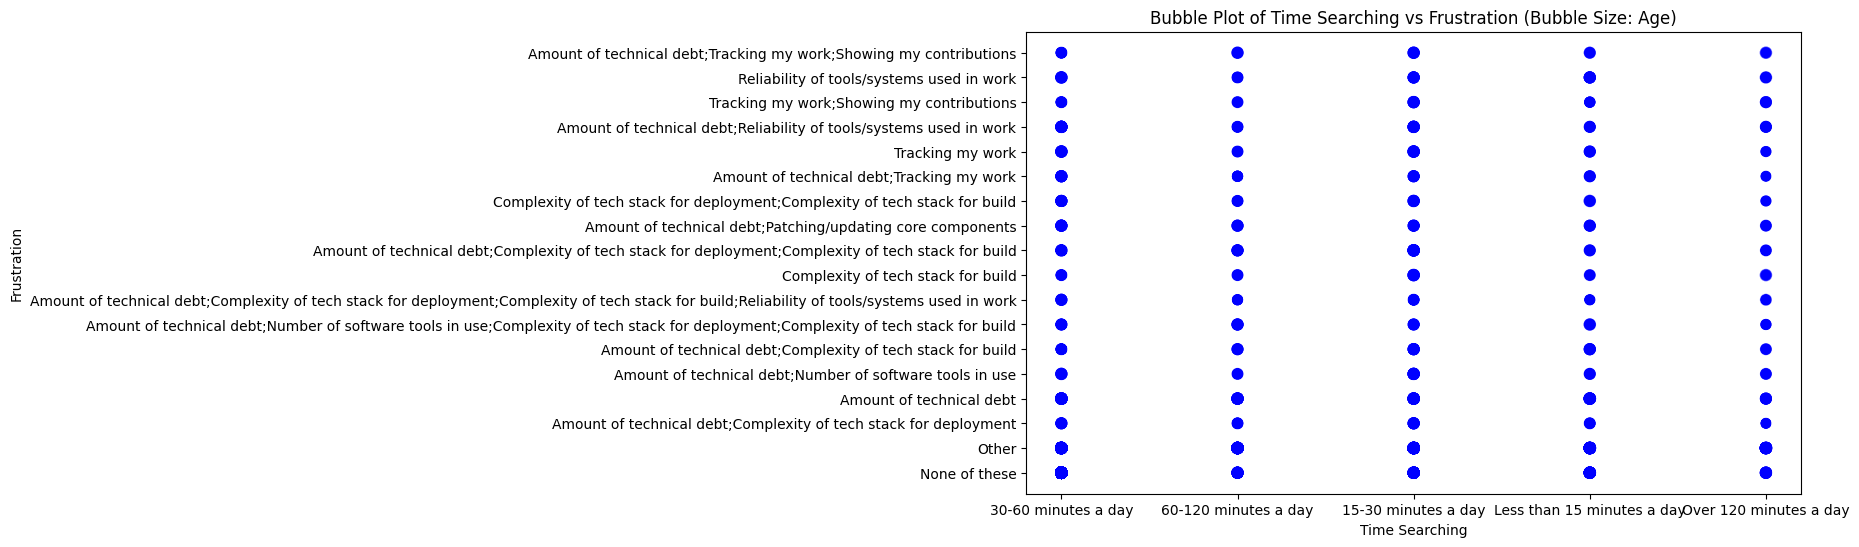

In [142]:
## Write your code here
QUERY = """
SELECT * FROM main
"""
df = pd.read_sql_query(QUERY, conn)

# Custom function to map values
def map_age(value):
    if value == 'Under 18 years old':
        return 18
    elif value == '18-24 years old':
        return 21
    elif value == '25-34 years old':
        return 29.5
    elif value == '35-44 years old':
        return 39.5
    elif value == '45-54 years old':
        return 49.5
    elif value == '55-64 years old':
        return 59.5
    elif value == '65 years or older':
        return 65
    else:
        return 29.5  # Default for random/unknown entries - Mode

# Apply the custom function
df['Age'] = df['Age'].apply(map_age)

df['Age'].astype(float)

df['Frustration'] = df['Frustration'].fillna(df['Frustration'].mode()[0])
df['TimeSearching'] = df['TimeSearching'].fillna(df['TimeSearching'].mode()[0])

# Count frequency of each value
value_counts = df['Frustration'].value_counts()

# Replace values with frequency below a threshold (e.g., 2) with "Other"
threshold = 280
df['Frustration'] = df['Frustration'].apply(lambda x: x if value_counts[x] >= threshold else 'Other')

# Map categorical values to numerical values for plotting
time_mapping = {value: idx for idx, value in enumerate(df['TimeSearching'].unique())}
frustration_mapping = {value: idx for idx, value in enumerate(df['Frustration'].unique())}

df['TimeSearching_num'] = df['TimeSearching'].map(time_mapping)
df['Frustration_num'] = df['Frustration'].map(frustration_mapping)

# Create the bubble plot
plt.figure(figsize=(10, 6))
plt.scatter(
    df['TimeSearching_num'], 
    df['Frustration_num'], 
    s=df['Age'],  # Bubble size
    alpha=0.6,    # Transparency
    c='blue'      # Bubble color
)

# Add labels and title
plt.xticks(ticks=list(time_mapping.values()), labels=list(time_mapping.keys()))
plt.yticks(ticks=list(frustration_mapping.values()), labels=list(frustration_mapping.keys()))
plt.xlabel('Time Searching')
plt.ylabel('Frustration')
plt.title('Bubble Plot of Time Searching vs Frustration (Bubble Size: Age)')

# Show the plot
plt.show()


### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


   Database Want To Work With  Counts
0                  PostgreSQL  3738.0
1  Firebase Realtime Database   141.0
2    MongoDB;MySQL;PostgreSQL   246.0
3           PostgreSQL;SQLite  1533.0
4             Cloud Firestore   148.0


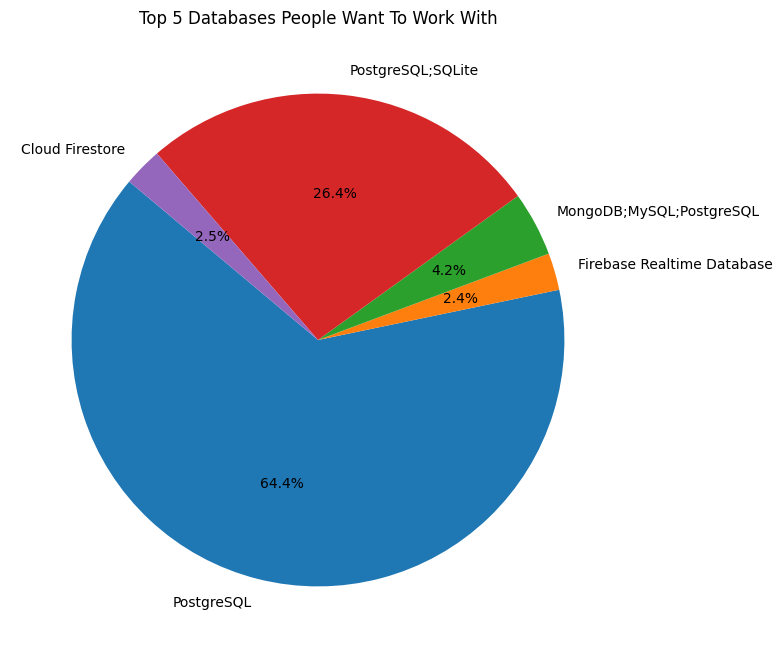

In [95]:
## Write your code here
DBWTWW1 = df['DatabaseWantToWorkWith']
DBWTWW1 = pd.DataFrame(DBWTWW1)
DBWTWW1['Counts'] = df['DatabaseWantToWorkWith'].map(df['DatabaseWantToWorkWith'].value_counts())
DBWTWW1 = DBWTWW1.drop(index=0)
DBWTWW1.columns = ['Database Want To Work With', 'Counts']
top_5_DBWTWW = DBWTWW1.head(5)
top_5_DBWTWW = top_5_DBWTWW.reset_index(drop=True)
print(top_5_DBWTWW)

# Extract data for the pie chart
labels = top_5_DBWTWW['Database Want To Work With']
sizes = top_5_DBWTWW['Counts']

# Create the pie chart
plt.figure(figsize=(8, 8))  # Optional: Adjust the figure size
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Top 5 Databases People Want To Work With')

# Display the chart
plt.show()



**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


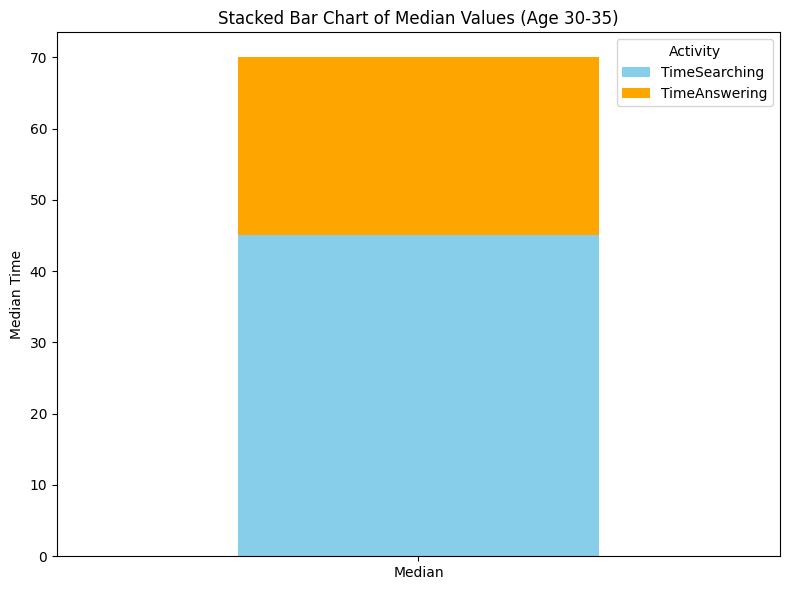

In [166]:
## Write your code here

# Create a data frame filtered on the age range
filtered_df = df[(df['Age'] >= 25) & (df['Age'] <= 35)]

# Create a data frame of all required columns
subset_df = filtered_df[['Age', 'TimeSearching', 'TimeAnswering']].copy()

# Remove the NaN values from the 'TimeAnswering' column
subset_df['TimeAnswering'] = subset_df['TimeAnswering'].fillna(df['TimeAnswering'].value_counts().index[0])

# Custom function to map values
def map_time(value):
    
    if value == 'Less than 15 minutes a day':
        return 10
    elif value == '15-30 minutes a day':
        return 25
    elif value == '30-60 minutes a day':
        return 45
    elif value == '60-120 minutes a day':
        return 90
    elif value == 'Over 120 minutes a day':
        return 150
    else:
        return 45  # Default for random/unknown entries - Mode

# Apply the custom function
subset_df['TimeSearching'] = subset_df['TimeSearching'].apply(map_time)
subset_df['TimeAnswering'] = subset_df['TimeAnswering'].apply(map_time)

# Change the datatype of the columns
subset_df['TimeSearching'] = subset_df['TimeSearching'].astype(int)
subset_df['TimeAnswering'] = subset_df['TimeAnswering'].astype(int)

labels = ['Less than 15 minutes a day', '15-30 minutes a day', '30-60 minutes a day', '60-120 minutes a day', 'Over 120 minutes a day']

# Calculate medians
median_values = {
    'TimeSearching': subset_df['TimeSearching'].median(),
    'TimeAnswering': subset_df['TimeAnswering'].median()
}

# Create a DataFrame for plotting
median_df = pd.DataFrame(median_values, index=['Median'])

# Plot stacked bar chart
median_df.plot(kind='bar', stacked=True, figsize=(8, 6), color=['skyblue', 'orange'])
plt.title('Stacked Bar Chart of Median Values (Age 30-35)')
plt.ylabel('Median Time')
plt.xticks(rotation=0)
plt.legend(title='Activity')
plt.tight_layout()
plt.show()


### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


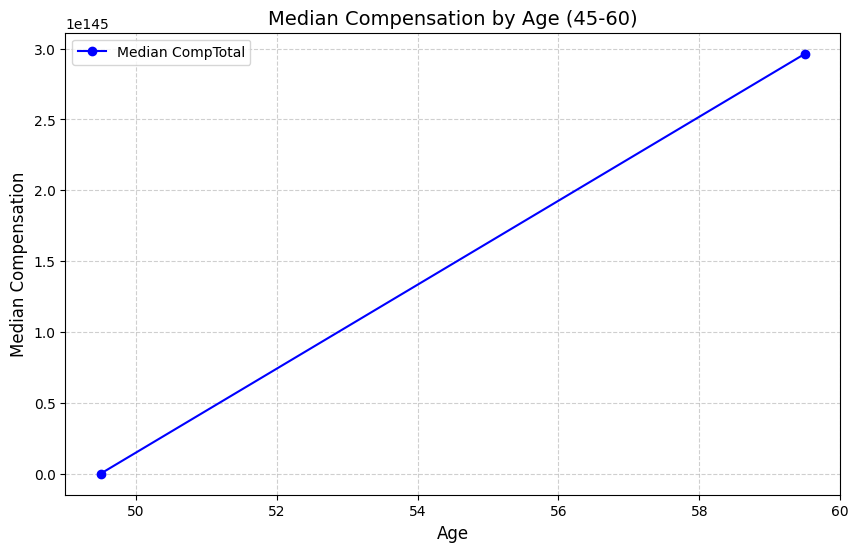

In [174]:
## Write your code here

# Remove the NaN values from the 'TimeAnswering' column
df['CompTotal'] = df['CompTotal'].fillna(df['CompTotal'].mean())

# Filter the DataFrame for ages between 45 and 60
filtered_df = df[(df['Age'] >= 45) & (df['Age'] <= 60)]

# Group by 'Age' and calculate the median of 'CompTotal'
median_values = filtered_df.groupby('Age')['CompTotal'].median()

# Plot the line plot
plt.figure(figsize=(10, 6))
plt.plot(median_values.index, median_values.values, marker='o', linestyle='-', color='b', label='Median CompTotal')
plt.title('Median Compensation by Age (45-60)', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Median Compensation', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()


**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


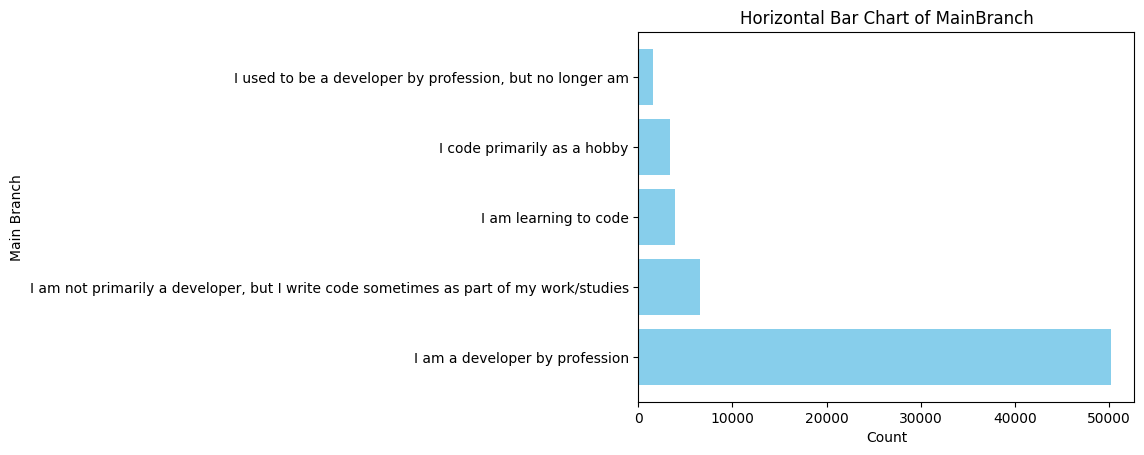

In [176]:
## Write your code here

# Grouping and counting the values in the MainBranch column
grouped_data = df['MainBranch'].value_counts()

# Plotting the horizontal bar chart
plt.barh(grouped_data.index, grouped_data.values, color='skyblue')
plt.xlabel('Count')
plt.ylabel('Main Branch')
plt.title('Horizontal Bar Chart of MainBranch')
plt.show()


### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [177]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
